In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
from classy import Class
from scipy.interpolate import interp1d

In [21]:
avals = {1e-6,1e-5,1e-4,1e-3,1e-7,1e-8}
cosmo = {}

for a in avals:
    cosmo[str(a)]=Class()
    cosmo[str(a)].set({'gauge':'synchronous',
                           'output':'tCl, lCl, mPk, pCl',
                           'omega_cdm':0.12038,
                           'recombination':'recfast',
                           'h':0.67556,
                           'lensing':'yes',
                           'f_bidm':0.99,
                           'm_bidm':100,
                           'bidm_type':'powerlaw',
                           'n_bidm':-4,
                           'a_bidm':a,
                           'A_bidm':1.7e-41,
                           'tight_coupling_trigger_tau_c_over_tau_h':0.002,
                           'tight_coupling_trigger_tau_c_over_tau_k':0.0003,
                           })
    cosmo[str(a)].compute()


In [18]:
ref = Class()
ref.set({'output':'tCl, lCl, mPk, pCl',
        'lensing':'yes'})
ref.compute()

/home/markus/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


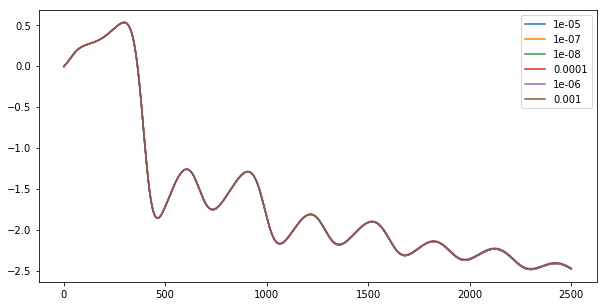

In [22]:
fig = plt.figure(1, figsize = (10,5))
ax = fig.add_subplot(111)
clref = ref.lensed_cl(2500)
TTref = clref['tt']
for a in avals:
    cl = cosmo[str(a)].lensed_cl(2500)
    l = cl['ell']
    TT = cl['tt']
    ax.plot(l,100*(TT-TTref)/TTref, label=a)
ax.legend()

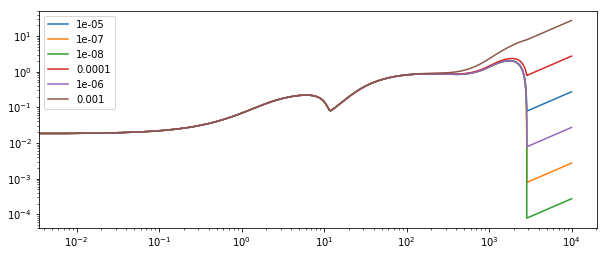

In [23]:
fig = plt.figure(1, figsize = (10,4))
ax = fig.add_subplot(111)
for a in avals:
    Th = cosmo[str(a)].get_thermodynamics()
    ax.loglog(Th['z'],Th['Tbidm [K]'],label=str(a))
ax.legend()